# Data Analytics for Test Cases

In [1]:
# Original code written by Kevin Pyles
# Dataset used in this example is fake data with the hope that someone could substitute their
# own test case data afterwards
# In this "Tutorial" It is hoped that a tester could generate a chart showing Test Runs
# by Team/Squad, by Release/Regression Run, and by Status
# The purpose is therefore to help a tester provide data showing which test cases are adding more value.
# It is also possible to show which testers are running more/less test cases during a given time and 
# to show which squads may have more test cases compared to other squads. 

In [2]:
# This tutorial was written using Jupyter Notebook. 
# Installation instructions can be found here: https://jupyter.readthedocs.io/en/latest/install.html 

In [3]:
# Pandas is used to make data manipulation easy.
import pandas as pd

## Get csv file into Pandas Dataframe

In [4]:
# The assumption is that you have copied the testcasedata.csv file to the same folder as this Python script.
# Then you can read in the file to a pandas dataframe really easily with just this one line of code. 
testcasedata = pd.read_csv('testcasedata.csv', quotechar='"')

## Display first 5 rows of testcasedata

In [5]:
# It is nice to confirm that we actually have the data so we print it out using head()
# which displays the first 5 rows of the dataset formatted nicely. 
testcasedata.head()

,TestCaseID,Team,Release Version,Tester,Run Date,Status
0,TC1,Speed Demons,Version .9,Bjorn,24-Oct-18,Pass
1,TC2,Brute Force,Version .9,Daniela,24-Oct-18,Pass
2,TC3,Hammerheads,Version .9,Yves,24-Oct-18,Pass
3,TC4,Panthers,Version .9,Vincent,24-Oct-18,Pass
4,TC5,Speed Demons,Version .9,Vincent,24-Oct-18,Pass


## Shape will return (Rows, Columns)

In [6]:
# This is just another way to confirm you got all the data. 
# shape will return the number of rows and columns. 
testcasedata.shape

(20000, 6)

## Print how many test cases have been run for each team

In [7]:
# Now we start to get into some data analytics. 
# With this simple command we can see how many test cases have been run for each team. 

print(testcasedata.groupby('Team').size())

Team
Arsenal         2042
Brute Force     2056
Cobras          1939
Dragons         1986
Enforcers       2032
Hammerheads     2040
Infinite        1985
Panthers        1987
Speed Demons    1933
Warriors        2000
dtype: int64


## Print how many test cases each tester has run

In [8]:
# And just a simple change to 'Tester' and we can see which testers are running the most test cases. 
# This is not sorted, feel free to research how to do that and make this even easier to read. 

print(testcasedata.groupby('Tester').size())

Tester
Ahmet        1164
Alice        1105
Bjorn        1110
Daniela      1069
Dmitry       1141
Ella         1088
Jessica      1120
Katarzyna    1145
Leon         1100
Nehir        1137
Noah         1141
Sophia       1073
Sota         1117
Suzanne      1092
Valentina    1094
Vijay        1138
Vincent      1084
Yves         1082
dtype: int64


In [9]:
# Add matplotlib to provide charting capabilities to Pandas.
import matplotlib.pyplot as plt

## Bar Chart with Test Case Count by Team

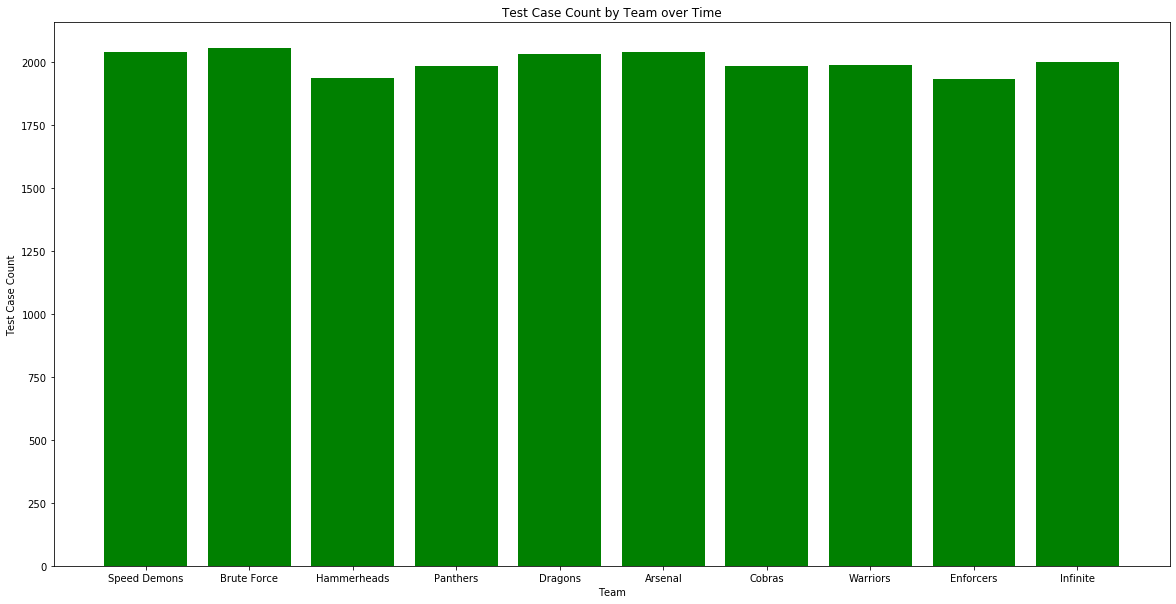

In [14]:
# In this chart we want to display how many test cases have been run per team 
# over the length of time for which we have data. This is the total test cases that have been run, 
# independent of status (pass/fail). 

# Get the names of each team for the chart labels
x = testcasedata["Team"].unique()
# Get the count of test cases run by each team
team = testcasedata.groupby('Team').size()
# Get an order for the teams for the chart
x_pos = [i for i, _ in enumerate(x)]

# Change the color of the bars in the chart
plt.bar(x_pos, team, color='green')
# Add a label to the x-axis
plt.xlabel("Team")
# Add a label to the y-axis
plt.ylabel("Test Case Count")
# Add a Title to the Chart
plt.title("Test Case Count by Team over Time")

# Change size of the chart so labels are spaced out
plt.rcParams["figure.figsize"] = [20,10]
# Change the x-axis bar labels to be the Team Names for this chart
plt.xticks(x_pos, x)
# Display the chart
plt.show()

## Bar Chart with Test Case Count of Passes by Team

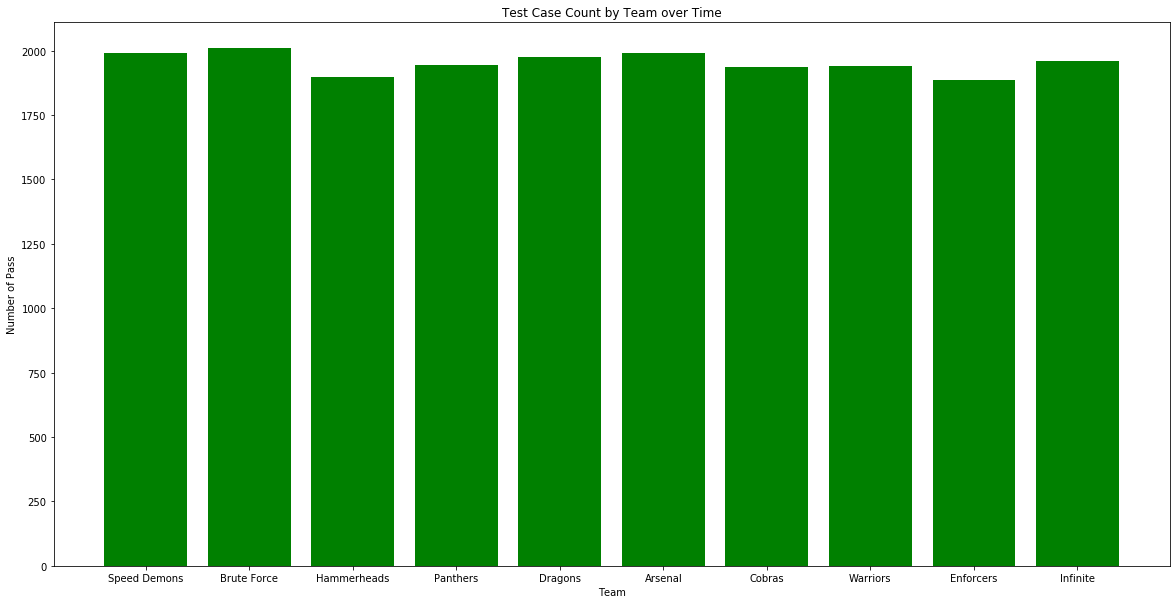

In [11]:
# In this chart we want to display how many test cases have been run per team and passed
# over the length of time for which we have data. 

# Get all test cases that are passing
passes = testcasedata.loc[testcasedata["Status"] == "Pass"]

# Get the names of each team for the chart labels
x = passes["Team"].unique()
# Get the count of test cases passing by each team
team = passes.groupby('Team').size()
# Get an order for the teams for the chart
x_pos = [i for i, _ in enumerate(x)]

# Change the color of the bars in the chart
plt.bar(x_pos, team, color='green')
# Add a label to the x-axis
plt.xlabel("Team")
# Add a label to the y-axis
plt.ylabel("Number of Pass")
# Add a Title to the Chart
plt.title("Test Case Count by Team over Time")

# Change size of the chart so labels are spaced out
plt.rcParams["figure.figsize"] = [20,10]
# Change the x-axis bar labels to be the Team Names for this chart
plt.xticks(x_pos, x)
# Display the chart
plt.show()

## Bar Chart with Test Case Count of Failures by Team

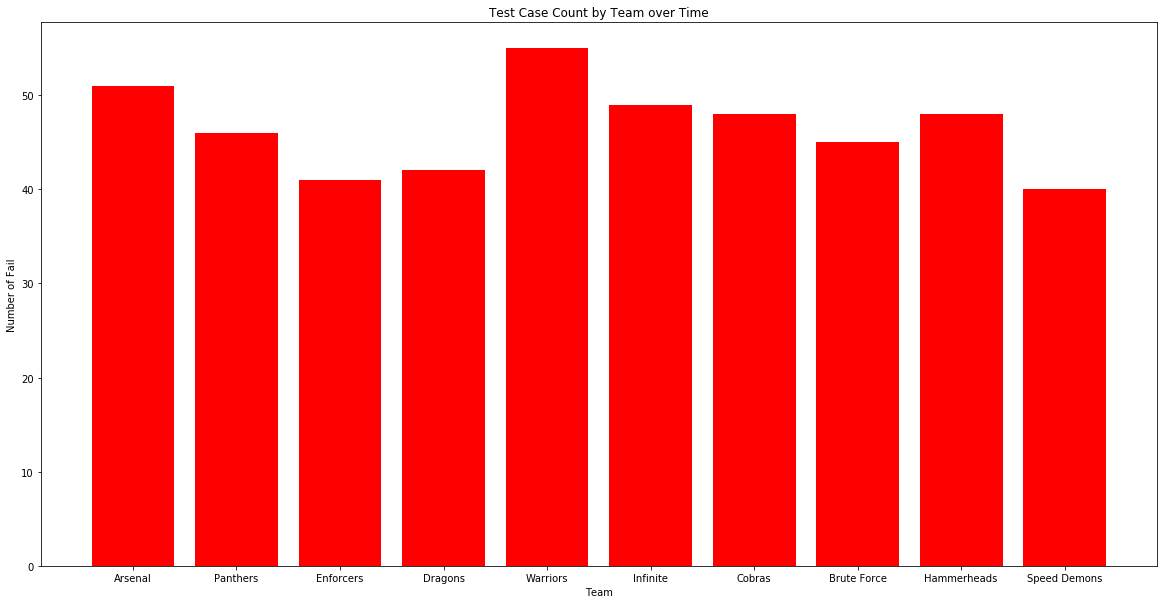

In [15]:
# In this chart we want to display how many test cases have been run per team and failed
# over the length of time for which we have data. 

# Get all test cases that are failing
failures = testcasedata.loc[testcasedata["Status"] == "Fail"]

# Get the names of each team for the chart labels
x = failures["Team"].unique()
# Get the count of test cases failing by each team
team = failures.groupby('Team').size()
# Get an order for the teams for the chart
x_pos = [i for i, _ in enumerate(x)]

# Change the color of the bars in the chart
plt.bar(x_pos, team, color='red')
# Add a label to the x-axis
plt.xlabel("Team")
# Add a label to the y-axis
plt.ylabel("Number of Fail")
# Add a Title to the Chart
plt.title("Test Case Count by Team over Time")

# Change size of the chart so labels are spaced out
plt.rcParams["figure.figsize"] = [20,10]
# Change the x-axis bar labels to be the Team Names for this chart
plt.xticks(x_pos, x)
# Display the chart
plt.show()

## Stacked Bar Chart with Test Count of Pass/Fail by Team

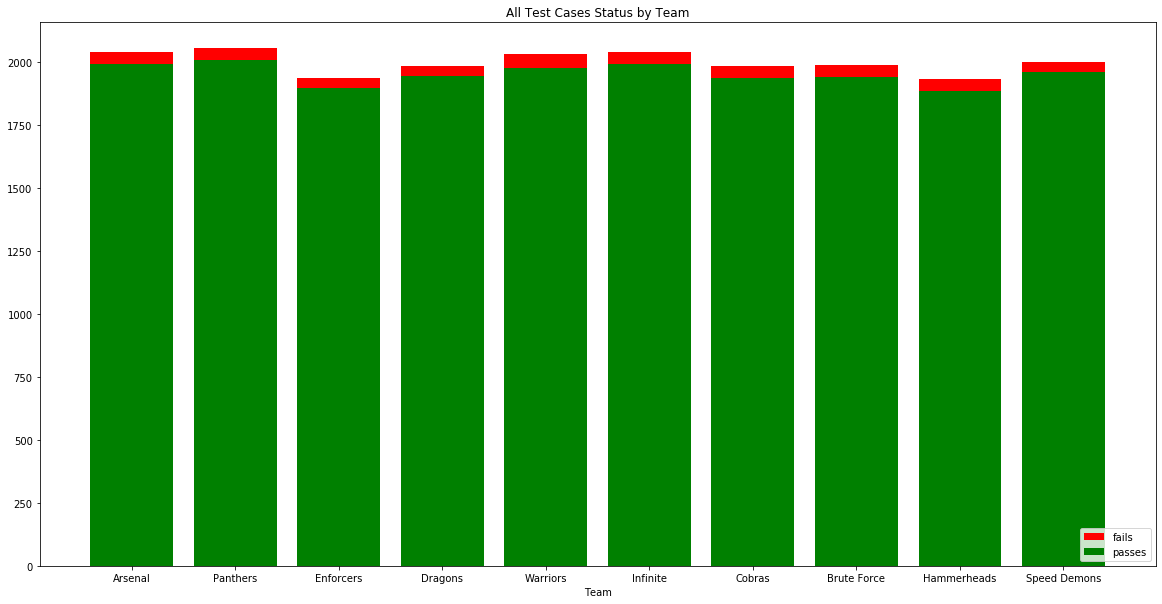

In [16]:
# In this chart we want to display how many test cases have been run per team and both failed and passed
# over the length of time for which we have data. 

# Get all test cases that are passing
passes = testcasedata.loc[testcasedata["Status"] == "Pass"]
# Get all test cases that are failing
failures = testcasedata.loc[testcasedata["Status"] == "Fail"]

# Get the names of each team for the chart labels
x = failures["Team"].unique()
# Get the count of test cases failing by each team
teamfail = failures.groupby('Team').size()
# Get the count of test cases passing by each team
teampass = passes.groupby('Team').size()
# Get an order for the teams for the chart
x_pos = [i for i, _ in enumerate(x)]

# Create the bars for the chart Fail and Pass, Notice the "teampass" count will be on the bottom of the chart
plt.bar(x_pos, teamfail, width=.8, label='fails', color='red', bottom=teampass)
plt.bar(x_pos, teampass, width=.8, label='passes', color='green')

# Add a label to the x-axis
plt.xlabel("Team")
# Add a Title to the Chart
plt.title("All Test Cases Status by Team")

# Change size of the chart so labels are spaced out
plt.rcParams["figure.figsize"] = [20,10]
# Change the x-axis bar labels to be the Team Names for this chart
plt.xticks(x_pos, x)
# Move the chart legend to the lower right side of the chart
plt.legend(loc="lower right")
# Display the chart
plt.show()

## Stacked Bar Chart with Test Count of Pass/Fail by Release

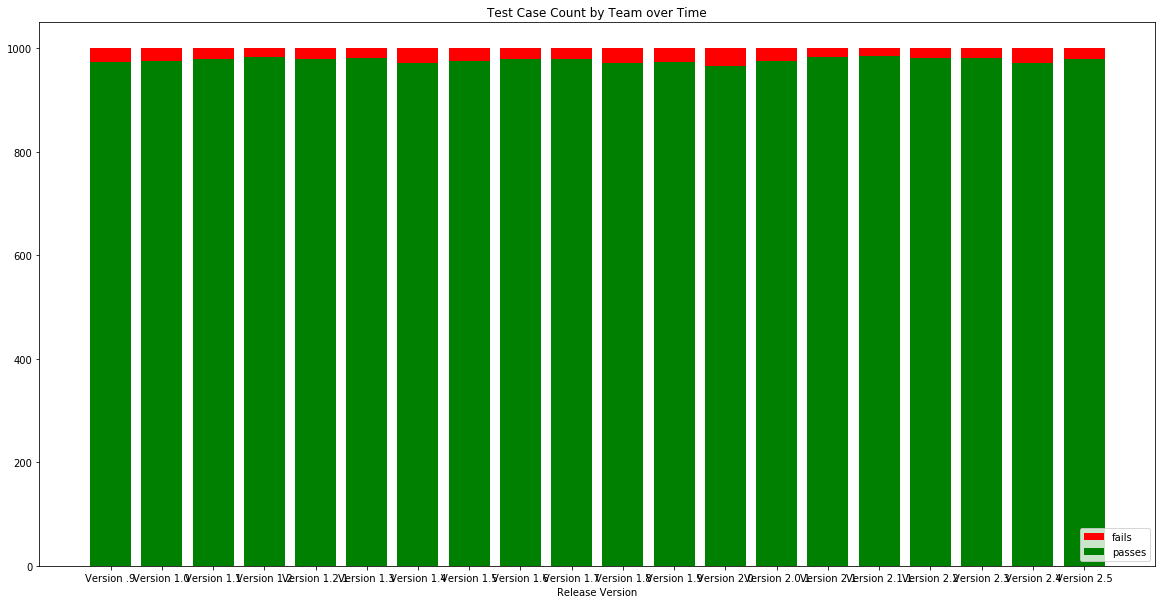

In [18]:
# In this chart we want to display how many test cases have been run per release and both failed and passed
# over the length of time for which we have data.

# Get all test cases that are passing
passes = testcasedata.loc[testcasedata["Status"] == "Pass"]
# Get all test cases that are failing
failures = testcasedata.loc[testcasedata["Status"] == "Fail"]

# Get the names of each Release Version for the chart labels
x = passes["Release Version"].unique()
# Get the count of test cases failing by each Release
releasefail = failures.groupby('Release Version').size()
# Get the count of test cases passing by each Release
releasepass = passes.groupby('Release Version').size()
# Get an order for the teams for the chart
x_pos = [i for i, _ in enumerate(x)]
# Create the bars for the chart Fail and Pass, Notice the "releasepass" count will be on the bottom of the chart
plt.bar(x_pos, releasefail, width=.8, label='fails', color='red', bottom=releasepass)
plt.bar(x_pos, releasepass, width=.8, label='passes', color='green')

# Add a label to the x-axis
plt.xlabel("Release Version")
# Add a Title to the Chart
plt.title("Test Case Count by Team over Time")

# Change size of the chart so labels are spaced out
plt.rcParams["figure.figsize"] = [20,10]
# Change the x-axis bar labels to be the Team Names for this chart
plt.xticks(x_pos, x)
# Move the chart legend to the lower right side of the chart
plt.legend(loc="lower right")
# Display the chart
plt.show()

In [ ]:
# Because I am a tester, I added these queries to 
# check for test cases so I could manually confirm the accuracy of the data. 

In [19]:
#Checking for number of test cases that have a "Fail" Status.
len(failures["TestCaseID"].unique())

94

In [20]:
# Test code to check for Passing test cases with a certain TestCaseID
testcasedata.loc[testcasedata['TestCaseID'] == 'TC89']

,TestCaseID,Team,Release Version,Tester,Run Date,Status
88,TC89,Panthers,Version .9,Vincent,24-Oct-18,Pass
1088,TC89,Dragons,Version 1.0,Leon,7-Nov-18,Pass
2088,TC89,Arsenal,Version 1.1,Ahmet,21-Nov-18,Pass
3088,TC89,Speed Demons,Version 1.2,Vincent,5-Dec-18,Pass
4088,TC89,Enforcers,Version 1.2.1,Alice,19-Dec-18,Pass
5088,TC89,Hammerheads,Version 1.3,Bjorn,2-Jan-19,Pass
6088,TC89,Brute Force,Version 1.4,Daniela,16-Jan-19,Pass
7088,TC89,Enforcers,Version 1.5,Sota,30-Jan-19,Pass
8088,TC89,Infinite,Version 1.6,Katarzyna,13-Feb-19,Pass
9088,TC89,Dragons,Version 1.7,Sophia,27-Feb-19,Pass
